In [56]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [57]:
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [58]:
sim1 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
sim2 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
sim3 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
sim4 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]


In [59]:
data1 = []

with open(sim1 + '.data', 'rb') as f:
    while True:
        try:
            data1.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data1 = pd.DataFrame(data1)
    
    
data2 = []
    
with open(sim2 + '.data', 'rb') as f:
    while True:
        try:
            data2.append(pickle.load(f))
        except EOFError:
            break
        
    data2 = pd.DataFrame(data2)
    
    
data3 = []
    
with open(sim3 + '.data', 'rb') as f:
    while True:
        try:
            data3.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data3 = pd.DataFrame(data3)
    
    
data4 = []
    
with open(sim4 + '.data', 'rb') as f:
    while True:
        try:
            data4.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
        
    data4 = pd.DataFrame(data4)

In [60]:
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)

In [61]:
s1 = pynbody.load(sim1)
h1 = s1.halos()
s1.physical_units()

In [62]:
s2 = pynbody.load(sim2)
h2 = s2.halos()
s2.physical_units()

In [63]:
s3 = pynbody.load(sim3)
h3 = s3.halos()
s3.physical_units()

In [64]:
s4 = pynbody.load(sim4)
h4 = s4.halos()
s4.physical_units()

In [10]:
data.keys()

Index(['B-V', 'B_mag', 'HIgasfrac', 'I_mag', 'M_gas', 'M_star', 'R_mag',
       'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90/Vdisp', 'V_mag', 'Xc', 'Yc', 'Zc',
       'a', 'age', 'c', 'c/a', 'fMhires', 'feh', 'gasfrac', 'h1dist', 'haloid',
       'hostHalo', 'id2', 'mHI', 'mass', 'n_gas', 'n_particles', 'n_star',
       'ovdens', 'sSFR', 'sfh', 'sfhbins', 'zgas', 'zstar'],
      dtype='object')

# Big Boys

In [15]:
#print(data4['M_star']>=1e8)
#print(data4['haloid'])

In [16]:
halo2a = h1.load_copy(2)
halo2a.physical_units()

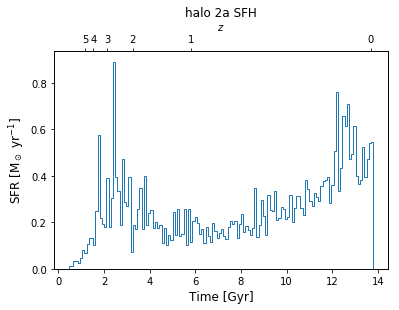

In [26]:
pynbody.plot.stars.sfh(halo2a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 2a SFH')
plt.savefig('halo 2a SFH')

plt.show()

In [38]:
del halo2a

In [18]:
halo3a = h1.load_copy(3)
halo3a.physical_units()

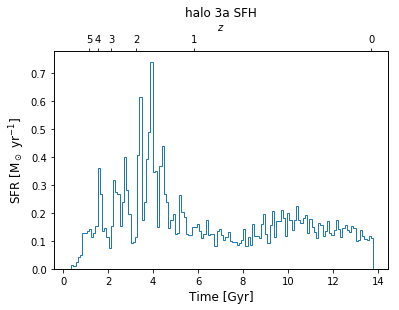

In [27]:
pynbody.plot.stars.sfh(halo3a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 3a SFH')
plt.savefig('halo 3a SFH')

plt.show()

In [39]:
del halo3a

In [20]:
halo5a = h1.load_copy(5)
halo5a.physical_units()

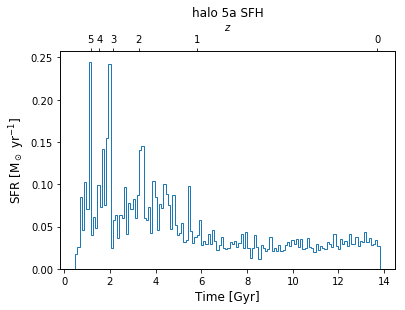

In [28]:
pynbody.plot.stars.sfh(halo5a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 5a SFH')
plt.savefig('halo 5a SFH')

plt.show()

In [40]:
del halo5a

In [11]:
halo9a = h1.load_copy(9)
halo9a.physical_units()

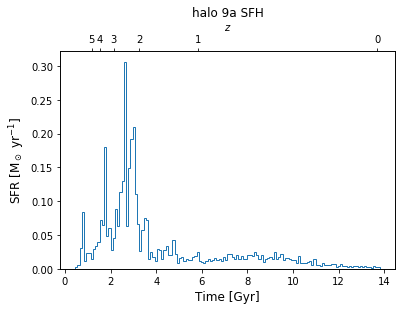

In [29]:
pynbody.plot.stars.sfh(halo9a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 9a SFH')
plt.savefig('halo 9a SFH')import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

plt.show()

In [57]:
pynbody.analysis.angmom.sideon(halo9a)

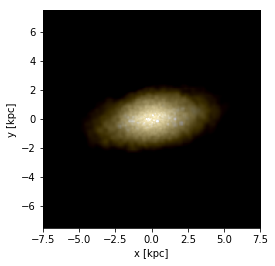

In [60]:
pynbody.plot.stars.render(halo9a, width='15 kpc')
plt.savefig('Halo 9a', dpi=300)
plt.show()

In [24]:
halo11a = h1.load_copy(11)
halo11a.physical_units()

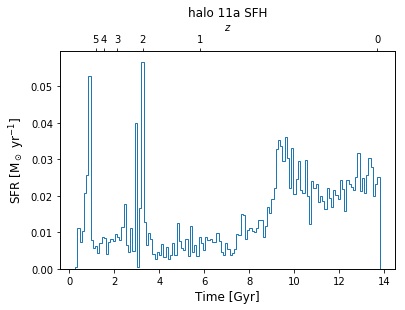

In [25]:
pynbody.plot.stars.sfh(halo11a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 11a SFH')
plt.savefig('halo 11a SFH')

plt.show()

In [41]:
del halo11a

In [12]:
halo12a = h1.load_copy(12)
halo12a.physical_units()

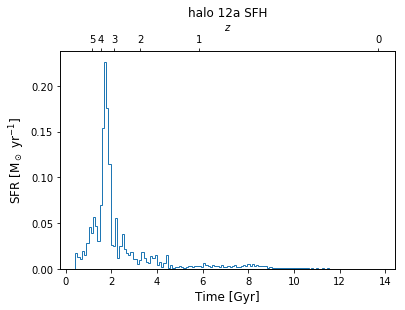

In [31]:
pynbody.plot.stars.sfh(halo12a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 12a SFH')
plt.savefig('halo 12a SFH')

plt.show()

In [61]:
pynbody.analysis.angmom.sideon(halo12a)

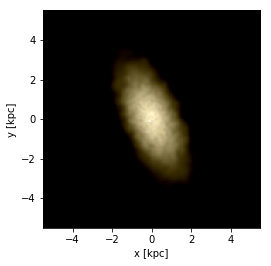

In [66]:
pynbody.plot.stars.render(halo12a, width='11 kpc')
plt.savefig('Halo 12a', dpi=300)
plt.show()

In [13]:
halo26a = h1.load_copy(26)
halo26a.physical_units()

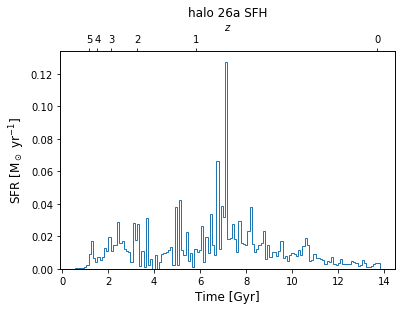

In [33]:
pynbody.plot.stars.sfh(halo26a, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 26a SFH')
plt.savefig('halo 26a SFH')

plt.show()

In [67]:
pynbody.analysis.angmom.sideon(halo26a)

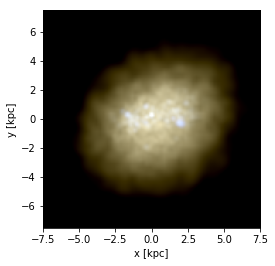

In [69]:
pynbody.plot.stars.render(halo26a, width='15import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph kpc')
plt.savefig('Halo 26a', dpi=300)
plt.show()

In [34]:
halo2b = h2.load_copy(2)
halo2b.physical_units()

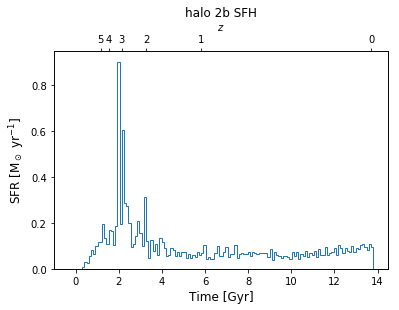

In [35]:
pynbody.plot.stars.sfh(halo2b, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 2b SFH')
plt.savefig('halo 2b SFH')

plt.show()

In [42]:
del halo2b

In [36]:
halo3b = h2.load_copy(3)
halo3b.physical_units()

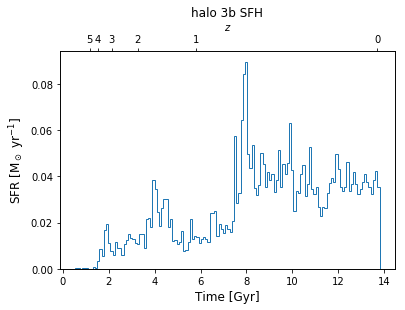

In [37]:
pynbody.plot.stars.sfh(halo3b, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 3b SFH')
plt.savefig('halo 3b SFH')

plt.show()

In [44]:
del halo3b

In [45]:
halo9c = h3.load_copy(9)
halo9c.physical_units()

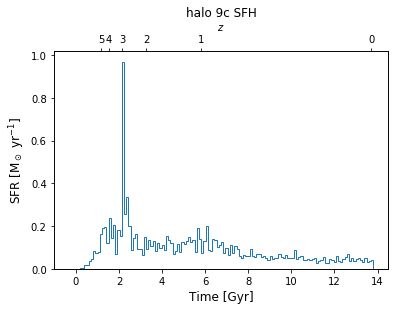

In [46]:
pynbody.plot.stars.sfh(halo9c, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 9c SFH')
plt.savefig('halo 9c SFH')

plt.show()

In [49]:
del halo9c

In [47]:
halo10c = h3.load_copy(10)
halo10c.physical_units()

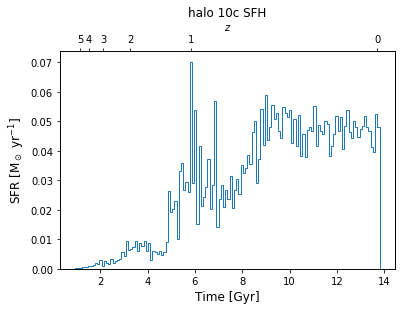

In [48]:
pynbody.plot.stars.sfh(halo10c, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 10c SFH')
plt.savefig('halo 10c SFH')

plt.show()

In [52]:
del halo10c

In [14]:
halo11c = h3.load_copy(11)
halo11c.physical_units()

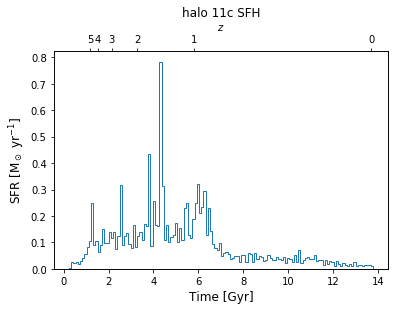

In [51]:
pynbody.plot.stars.sfh(halo11c, filename=None, massform=True, clear=False, legend=False, subplot=False, trange=False, bins=138)
plt.title('halo 11c SFH')
plt.savefig('halo 11c SFH')

plt.show()

In [70]:
pynbody.analysis.angmom.sideon(halo11c)

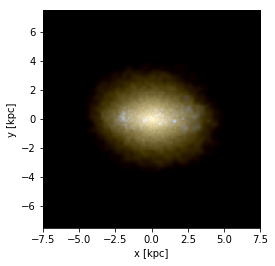

In [71]:
pynbody.plot.stars.render(halo11c, width='15 kpc')
plt.savefig('Halo 11c', dpi=300)
plt.show()

# H 9, 12, 26, 11

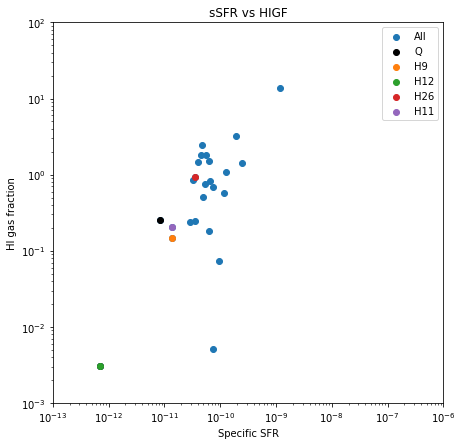

In [65]:
plt.figure(figsize=(7,7))
plt.scatter(data['sSFR'], data['HIgasfrac'], label='All', c='black')
plt.scatter(data1['sSFR'][data1['haloid']==9], data1['HIgasfrac'][data1['haloid']==9], label='H9')
plt.scatter(data1['sSFR'][data1['haloid']==12], data1['HIgasfrac'][data1['haloid']==12], label='H12')
plt.scatter(data1['sSFR'][data1['haloid']==26], data1['HIgasfrac'][data1['haloid']==26], label='H26')
plt.scatter(data3['sSFR'][data3['haloid']==11], data3['HIgasfrac'][data3['haloid']==11], label='H11')

plt.loglog()
plt.xlim(1e-13, 1e-6)
plt.ylim(1e-3, 1e2)

plt.legend()
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('sSFR vs HIGF')
plt.show()

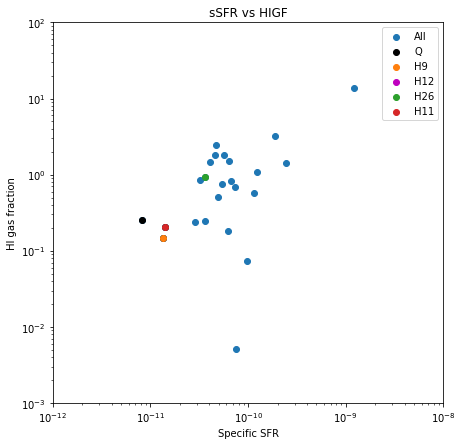

In [73]:
plt.figure(figsize=(7,7))
plt.scatter(data['sSFR'], data['HIgasfrac'], label='All')
plt.scatter(data['sSFR'][data['sSFR']<2e-11], data['HIgasfrac'][data['sSFR']<2e-11], label='Q', c='black')
plt.scatter(data1['sSFR'][data1['haloid']==9], data1['HIgasfrac'][data1['haloid']==9], label='H9')
plt.scatter(data1['sSFR'][data1['haloid']==12], data1['HIgasfrac'][data1['haloid']==12], label='H12', c='m')
plt.scatter(data1['sSFR'][data1['haloid']==26], data1['HIgasfrac'][data1['haloid']==26], label='H26')
plt.scatter(data3['sSFR'][data3['haloid']==11], data3['HIgasfrac'][data3['haloid']==11], label='H11')

plt.loglog()
plt.xlim(1e-12, 1e-8)
plt.ylim(1e-3, 1e2)

plt.legend()
plt.xlabel (r'Specific SFR')
plt.ylabel (r'HI gas fraction')
plt.title ('sSFR vs HIGF')
plt.savefig('sSFR vs HIGF')
plt.show()

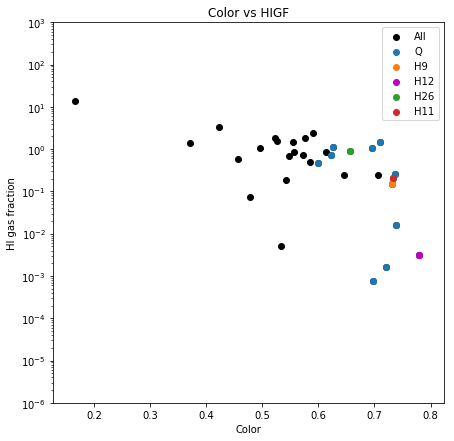

In [75]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['HIgasfrac'], c='black',label='All')
plt.scatter(data['B-V'][data['sSFR']<2e-11], data['HIgasfrac'][data['sSFR']<2e-11], label='Q')
plt.scatter(data1['B-V'][data1['haloid']==9], data1['HIgasfrac'][data1['haloid']==9], label='H9')
plt.scatter(data1['B-V'][data1['haloid']==12], data1['HIgasfrac'][data1['haloid']==12], label='H12', c='m')
plt.scatter(data1['B-V'][data1['haloid']==26], data1['HIgasfrac'][data1['haloid']==26], label='H26')
plt.scatter(data3['B-V'][data3['haloid']==11], data3['HIgasfrac'][data3['haloid']==11], label='H11')

plt.semilogy()
plt.ylim(1e-6, 1e3)

plt.legend()
plt.xlabel ('Color')
plt.ylabel ('HI gas fraction')
plt.title ('Color vs HIGF')
plt.savefig('Color vs HIGF')
plt.show()

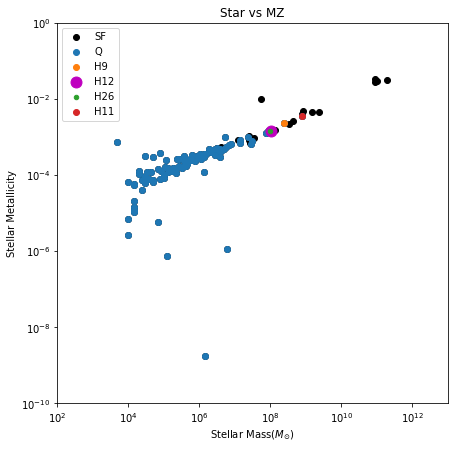

In [76]:
plt.figure(figsize=(7,7))
plt.scatter(data['M_star'], data['zstar'], label='SF', c='black')
plt.scatter(data['M_star'][data['sSFR']<2e-11], data['zstar'][data['sSFR']<2e-11], label='Q')
plt.scatter(data1['M_star'][data1['haloid']==9], data1['zstar'][data1['haloid']==9], label='H9')
plt.scatter(data1['M_star'][data1['haloid']==12], data1['zstar'][data1['haloid']==12], s=120, c='m', label='H12')
plt.scatter(data1['M_star'][data1['haloid']==26], data1['zstar'][data1['haloid']==26], s=20, label='H26')
plt.scatter(data3['M_star'][data3['haloid']==11], data3['zstar'][data3['haloid']==11], label='H11')

plt.loglog()
plt.ylim(1e-10, 1)
plt.xlim(1e2, 1e13)

plt.legend()
plt.xlabel (r'Stellar Mass($M_{\odot}$)')
plt.ylabel ('Stellar Metallicity')
plt.title ('Star vs MZ')
plt.savefig('Star vs MZ')
plt.show()

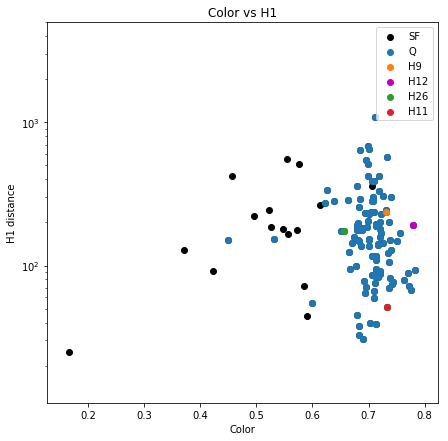

In [87]:
plt.figure(figsize=(7,7))
plt.scatter(data['B-V'], data['h1dist'], label='SF', c='black')
plt.scatter(data['B-V'][data['sSFR']<2e-11], data['h1dist'][data['sSFR']<2e-11], label='Q')
plt.scatter(data1['B-V'][data1['haloid']==9], data1['h1dist'][data1['haloid']==9], label='H9')
plt.scatter(data1['B-V'][data1['haloid']==12], data1['h1dist'][data1['haloid']==12], label='H12', c='m')
plt.scatter(data1['B-V'][data1['haloid']==26], data1['h1dist'][data1['haloid']==26], label='H26')
plt.scatter(data3['B-V'][data3['haloid']==11], data3['h1dist'][data3['haloid']==11], label='H11')

#[data['sSFR']<1e-11]

plt.semilogy()
plt.ylim(11, 5e3)

plt.legend()
plt.xlabel ('Color')
plt.ylabel ('H1 distance')
plt.title ('Color vs H1')
plt.savefig('Color vs H1')
plt.show()

# FORM

In [15]:
pynbody.analysis.angmom.faceon(halo9a)

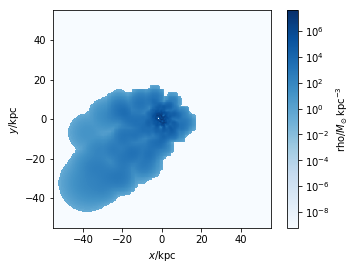

In [167]:
pynbody.plot.image(halo9a.g, width=110, cmap='Blues')
plt.savefig('halo 9a  gas')
plt.show()

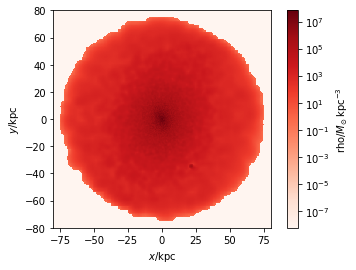

In [166]:
vmin=5e2, vmax=1e6pynbody.plot.image(halo9a.dm, width=160, cmap='Reds')
plt.savefig('halo 9a  DM')
plt.show()

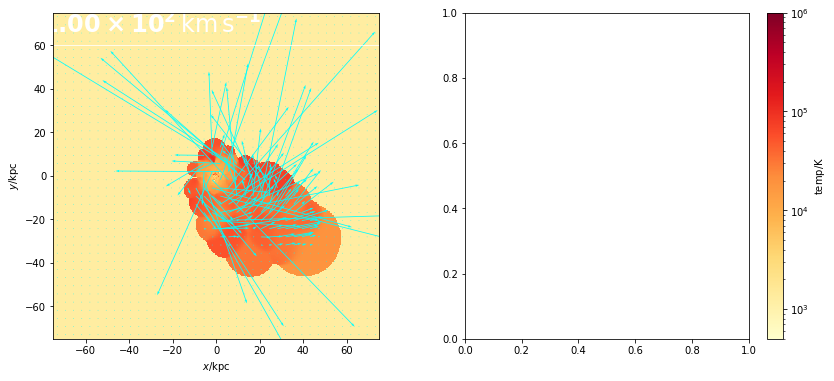

In [23]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo9a.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 9a', dpi=300)
plt.show()

In [17]:
pynbody.analysis.angmom.faceon(halo12a)

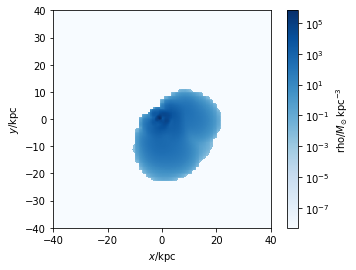

In [184]:
pynbody.plot.image(halo12a.g, width=80, cmap='Blues')
plt.savefig('halo 12a  gas')
plt.show()

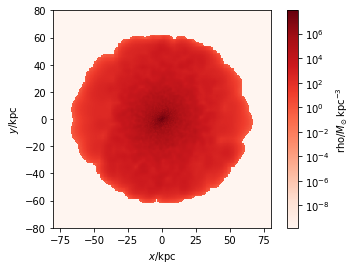

In [173]:
pynbody.plot.image(halo12a.dm, width=160, cmap='Reds')
plt.savefig('halo 12a  DM')
plt.show()

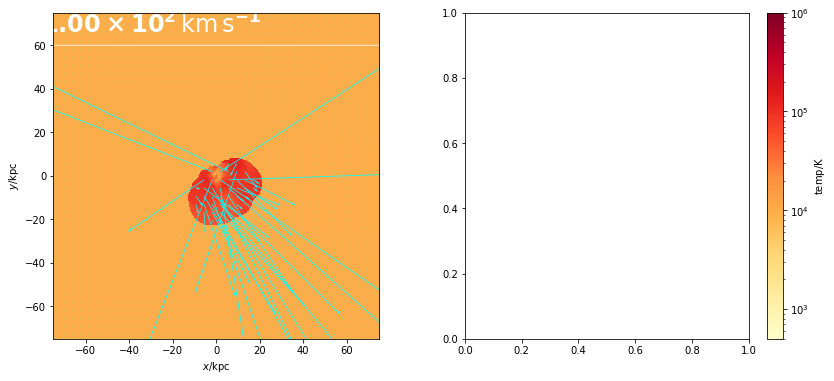

In [24]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo12a.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 12a', dpi=300)
plt.show()

In [19]:
pynbody.analysis.angmom.faceon(halo26a)

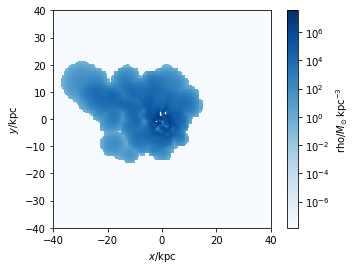

In [183]:
pynbody.plot.image(halo26a.g, width=80, cmap='Blues')
plt.savefig('halo 26a  gas')
plt.show()

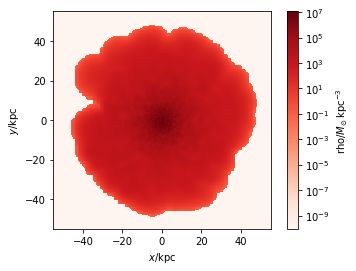

In [177]:
pynbody.plot.image(halo26a.dm, width=110, cmap='Reds')
plt.savefig('halo 26a  DM')
plt.show()

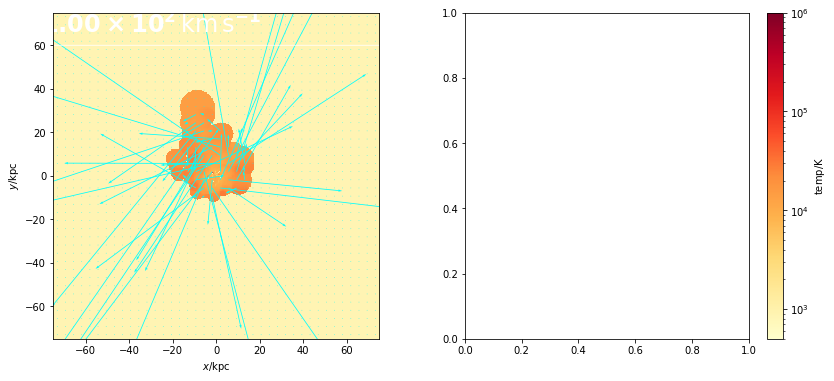

In [25]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo26a.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 26a', dpi=300)
plt.show()

In [21]:
pynbody.analysis.angmom.faceon(halo11c)

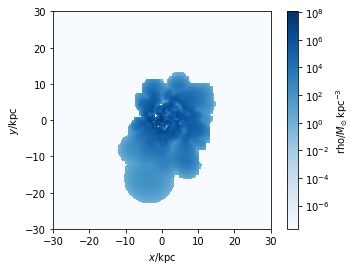

In [180]:
pynbody.plot.image(halo11c.g, width=60, cmap='Blues')
plt.savefig('halo 11c  gas')
plt.show()

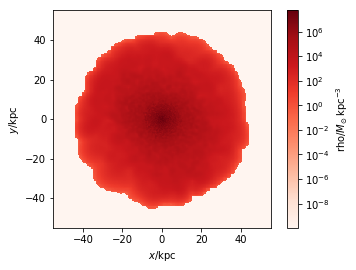

In [182]:
pynbody.plot.image(halo11c.dm, width=110, cmap='Reds')
plt.savefig('halo 11c  DM')
plt.show()

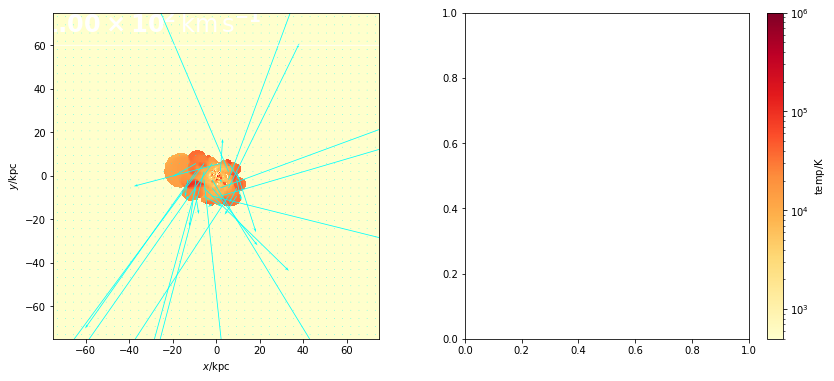

In [26]:
f, axs = plt.subplots(1,2,figsize=(14,6))
sph.velocity_image(halo11c.g, vector_color="cyan", qty="temp",width=150,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = True, vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 11c', dpi=300)
plt.show()

In [196]:
print(data3['HIgasfrac'][data3['haloid']==11])
print(data3['sSFR'][data3['haloid']==11])
print(data1['HIgasfrac'][data1['haloid']==9])
print(data1['sSFR'][data1['haloid']==9])

4    0.20672571360755113
Name: HIgasfrac, dtype: object
4    1.39252e-11
Name: sSFR, dtype: object
6    0.14671724636338082
Name: HIgasfrac, dtype: object
6    1.35783e-11
Name: sSFR, dtype: object


In [36]:
halo26a.gas.keys()

['vx',
 'temp',
 'phi',
 'vel',
 'vz',
 'x',
 'vy',
 'mass',
 'eps',
 'metals',
 'y',
 'smooth',
 'rho',
 'z',
 'pos']

In [32]:
print(halo26a.gas['mass'])

[26621.790669   26627.91982643 26513.61596225 ... 26593.39344846
 26540.46232807 26512.00293518]


In [37]:
np.sum(halo26a.gas['temp']*halo26a.gas['mass'])/data1['M_gas'][data1['haloid']==26]

12    9228.158687555648
Name: M_gas, dtype: object

In [38]:
data.keys()

Index(['B-V', 'B_mag', 'HIgasfrac', 'I_mag', 'M_gas', 'M_star', 'R_mag',
       'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90/Vdisp', 'V_mag', 'Xc', 'Yc', 'Zc',
       'a', 'age', 'c', 'c/a', 'fMhires', 'feh', 'gasfrac', 'h1dist', 'haloid',
       'hostHalo', 'id2', 'mHI', 'mass', 'n_gas', 'n_particles', 'n_star',
       'ovdens', 'sSFR', 'sfh', 'sfhbins', 'zgas', 'zstar'],
      dtype='object')

In [40]:
halo26a.derivable_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'smooth',
 'rho',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform']

In [86]:
data4['mass'][data4['haloid']==135]

10    246619721.01647234
Name: mass, dtype: object